In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler


In [2]:
with open('embeddings_all.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"]
y = data["labels"]

In [3]:
print(x.shape)
print(x)

torch.Size([49984, 344])
tensor([[-4.0658,  0.4799,  0.2382,  ...,  0.1069,  0.6385, -0.6550],
        [-0.6265, -0.6888,  0.3135,  ...,  0.9682,  3.7766, -1.7888],
        [ 1.8558, -0.4909,  0.0466,  ..., -0.8001, -1.6884, -2.9808],
        ...,
        [-1.7552, -2.7167,  0.0688,  ...,  0.0928, -2.6108, -1.0271],
        [-4.9407, -0.0754,  0.2270,  ..., -0.3963,  6.9203,  1.0549],
        [-4.2442,  0.6847,  0.3223,  ...,  0.0873,  0.0090,  0.5538]])


In [4]:
# normalize the data
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)

[[-0.79422998  0.31073217  0.8466967  ...  0.05511847  0.34089785
  -0.38548242]
 [ 0.06681789 -0.46497986  1.64957886 ...  0.55651235  1.90479349
  -1.10661588]
 [ 0.68827947 -0.33365929 -1.19682446 ... -0.47284786 -0.81873599
  -1.86478567]
 ...
 [-0.21575711 -1.81103654 -0.96018947 ...  0.04693091 -1.27845021
  -0.62213173]
 [-1.01327525 -0.05786803  0.72689465 ... -0.237784    3.47148819
   0.70207937]
 [-0.83889153  0.44667431  1.74406266 ...  0.04372579  0.02717888
   0.38335267]]


In [5]:
x_1 = np.array(x[:5000, :], dtype=np.double)
print(x_1.shape)

(5000, 344)


In [6]:
#do PCA with 100 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
x_pca = pca.fit_transform(x_1)
print(x_pca.shape)

(5000, 100)


In [7]:
# use BIRCH to cluster

from sklearn.cluster import Birch
brc = Birch(branching_factor=10, n_clusters=10, threshold=0.5, compute_labels=True)
brc.fit(x)
labels = brc.predict(x_pca)
print(labels.shape)
print(labels)

np.unique(labels,return_counts=True)

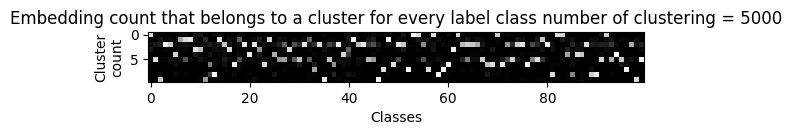

In [17]:
a = np.zeros((10,100))

#print(a)

for i, cluster in enumerate(labels):
    a[cluster][y[i]] += 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(labels.shape[0]))
plt.imshow(a,cmap='Greys_r')


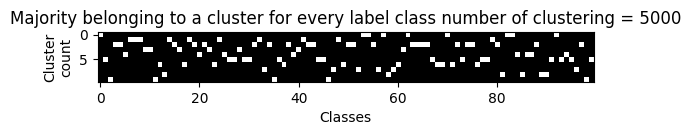

In [22]:
## majority voting for each class
b = np.argmax(a, axis=0)

c = np.zeros((10,100))
for x in range(100):    
    c[b[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering = " + str(labels.shape[0]))
plt.imshow(c, cmap='Greys_r')

In [23]:
np.sum(c, axis=1)

array([ 9., 10., 23.,  7.,  8., 16., 10.,  6.,  6.,  5.])

In [25]:
false_negative = np.ma.array(a,mask=c)
sum_fn = np.sum(false_negative)
print(sum_fn)

989.0
